# Distribución Normal Estandard
+ Definición
+ Forma
+ Calculos de probabilidad
###### https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_dist.html
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dist.html#scipy.stats.norm
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncdist.html#scipy.stats.truncnorm


In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from dist_prob_plotgraphs import distr_prob, inter_confi, reg_critica

The probability density is defined in the “standardized” form. 
+ To shift and/or scale the distribution use the loc and scale parameters. 
+ Specifically, dist.pdf(x, loc, scale) is identically equivalent to dist.pdf(y) / scale 
    + with y = (x - loc) / scale. 
+ Note that shifting the location of a distribution does not make it a “noncentral” distribution; noncentral generalizations of some distributions are available in separate classes.

Calculo de los estadisticos (4 momentos) de la versión normal estandard
+ En su versión estandard la distribución normal tiene:
    + µ = 0
    + 𝞂2 = 1
    + sesgo = 0
    + kurtosis = 0

In [2]:
# Estadísticos de la distribución uniforme como aparecen en su forma estandard
mean, var, skew, kurt = norm.stats(moments='mvsk')
mean, var, skew, kurt

(0.0, 1.0, 0.0, 0.0)

### Creación de una función de distribución estandard
Se puede crear la forma estandard de la distribución con Scipy
+ 1. primero se crean los valores de x, con ppf
    + ppf define los percentiles sobre x (por ejemplo 100)
+ 2. Luego se generan los valores de la función (y o f(x)) con el método pdf

In [3]:
# Creación de los valores de x o percentiles
# Como la distribución es normal distribuye los valores desde negativos hasta positivos
#   con media en cero
# x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
x = np.linspace(-4, +4, 1000)

# Creacion de los valores de y o f(x)
# Se obtienen con el método pdf. Una forma es directamente: dist.pdf(x)
y = norm.pdf(x) # dist.pdf genera una nueva distribución normal cada vez que se la llama. y en cambio es una instancia que no varía más.

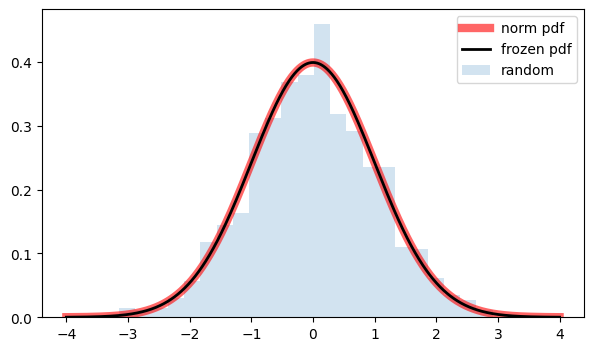

In [4]:
# Visualización con matplotlib.pyplot
# Genero la plantilla del grafico
fig, ax = plt.subplots(1, 1, figsize = (7,4))

# Dibujo la distribución normal
ax.plot(x, norm.pdf(x), 'r-', lw=6, alpha=0.6, label='norm pdf')

# Como alternativa, se puede llamar al objeto de distribución (como función) para fijar los parámetros de forma, ubicación y escala. 
# Esto devuelve un objeto RV “congelado” que mantiene fijos los parámetros dados.
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Generación de números aleatorios con distribución normal para ver si ajustan a la curva de distribución normal creada
r = norm.rvs(size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='random')

# Activar las leyendas
ax.legend()

plt.show()

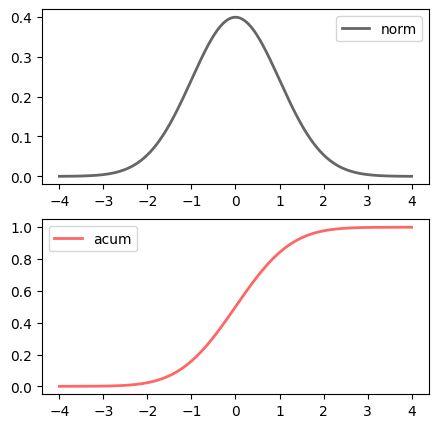

In [5]:
# Distribución Acumulada
# Genero la plantilla del grafico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5,5))

# Dibujo la distribución normal
ax1.plot(x, norm.pdf(x), 'k-', lw=2, alpha=0.6, label='norm')
ax2.plot(x, norm.cdf(x), 'r-', lw=2, alpha=0.6, label='acum')

# Activar las leyendas
ax1.legend()
ax2.legend()

plt.show()

Como es fácil de suponer, el área bajo la curva de una districución estandard es igual a 1

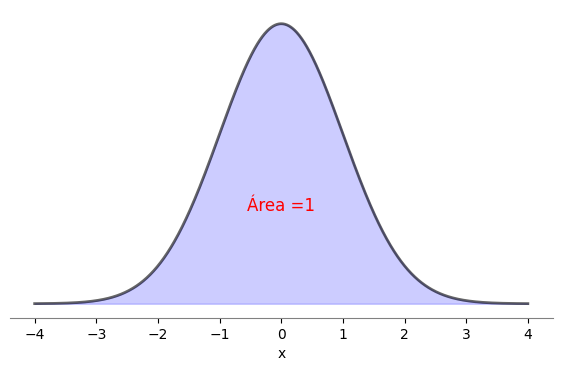

In [6]:
# Visualización del área bajo la curva
# Genero la plantilla del grafico
fig, ax = plt.subplots(1, 1, figsize = (7,4))

# Dibujo la distribución normal
ax.plot(x, norm.pdf(x), 'k-', lw=2, alpha=0.6, label='norm pdf')
# Sombreado del área bajo la curva
ax.fill_between(x, 0, norm.pdf(x), color='blue', alpha=0.2, label='Área bajo la curva')

# Añadir texto en el centro del gráfico
x_centro = (x.max() + x.min()) / 2  # Punto medio del eje X
y_centro = 0.14  # Valor arbitrario en el eje Y (cerca del centro de la distribución)
ax.text(x_centro, y_centro, f"Área =1",  # Texto con formato
        ha='center', va='center', fontsize=12, color='red')  # Alineación y estilo

# Personalización del gráfico
# ax.set_title('Distribución Normal Estandard')
ax.set_xlabel('x')
# ax.set_ylabel('Densidad de probabilidad')
# ax.legend()
# plt.grid(True)

ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')

plt.show()


#### Creación de la distribución normal a partir de la fórmula
Una distribución normal se puede crear a partir de su formula matemática en lugar de usar Scipy

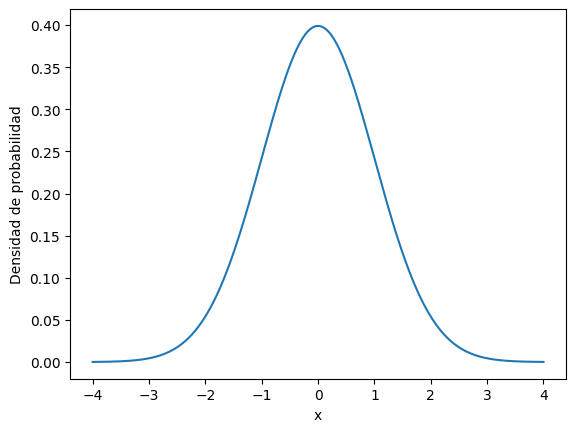

In [7]:
# Creación de una distribución normal a partir de su formula
media = 0
desviacion_estandar = 1

limite_inferior = media - 4 * desviacion_estandar
limite_superior = media + 4 * desviacion_estandar
num_puntos = 1000

x = np.linspace(limite_inferior, limite_superior, num_puntos)
pdf_normal = (1 / (desviacion_estandar * np.sqrt(2 * np.pi))) * np.exp(-((x - media) ** 2) / (2 * desviacion_estandar ** 2))

fig, ax = plt.subplots()
ax.plot(x, pdf_normal)
# ax.set_title('Distribución normal')
ax.set_xlabel('x')
ax.set_ylabel('Densidad de probabilidad')
# plt.grid(True)
plt.show()


## Gráfico de la distribución normal estandard y cálculos de probabilidad
+ Veamos los calculos de probabilidad dentro de una distribución normal estandard
    1. Distribución de probabilidad estandard completa (100%)
    2. Diribución de probabilidad de que x sea menor o igual a 0 (50%)
    3. Probabilidad entre -1 y 1
    4. Probabilidad entre -2 y 2

dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


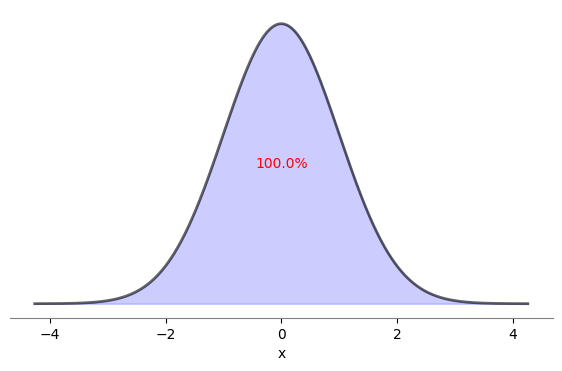

In [8]:
# Función de Distribución de Probabilidad Normal - Visualización del área del calculo y resultados
distr_prob(norm())

dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


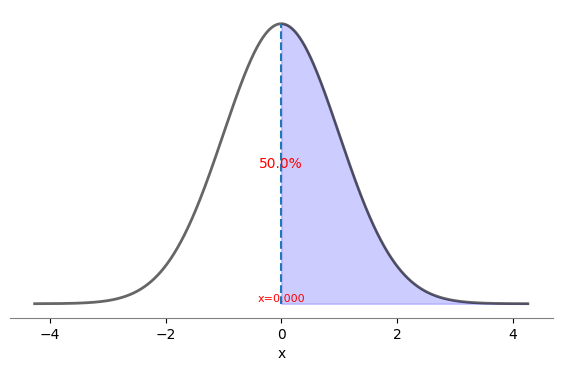

In [9]:
# Distribución de probabilidad estandard mayor o igual que cero
distr_prob(norm(), a=0)

dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


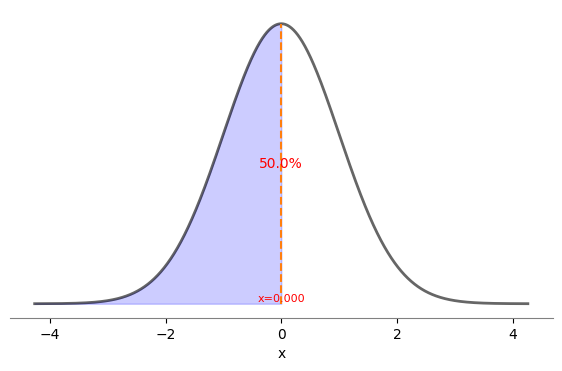

In [10]:
# Probabilidad de que x tenga un valor menor o igual que cero igual al 50%
distr_prob(norm(), b = 0)

dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


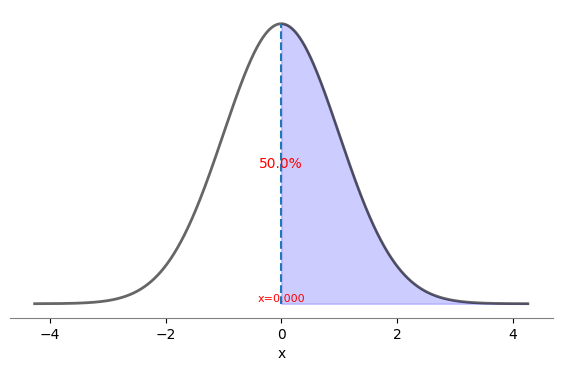

In [11]:
# Probabilidad de que x tenga un valor menor o igual que cero igual al 50%
distr_prob(norm(), a = 0)

## Intervalo de confianza
+ 1 La regla del intervalo ofrece intervalos de confianza aproximados:
    + 1. IC 68%. Está delimitado el 68% probabilidad entre -1 desvío y +1 desvío estandard.
    + 2. IC 95%. Está delimitado por el 95% de probabilidad entre -2 desvíos y + dos desvíos estandard.
    + 3. IC 99%. Está delimitado por el 99% de probabilidad entre +-2.575 desvíos estandard.
    + 4. IC 99.7%. Está delimitado por el 99.7% de probabilidad entre +-3 desvíos estandard.
+ 2 La regla del intervalo ofrece intervalos más precisos:
    + 1. IC 68.3% para 𝞂 = +-1
    + 2. IC 95% para 𝞂 = +-1.96
    + 3. IC 99% para 𝞂 = +-2.575
    + 4. IC 99.7% para 𝞂 = +-3

Intervalo para un nivel de confianza del 68%
media: 0.0, desv.std.: 1.0 , sesgo: 0.0, kurtosis: 0.0)
Nivel de confianza: 68.0%.
Percentiles a y b : 0.160 y 0.840
Valores de x      : -0.994 y 0.994.
Valores de Z o S  : -0.99 y 0.99
Probs. acums.     : 0.160 y 0.160.
Prob. a + b       : 32.00%.
dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


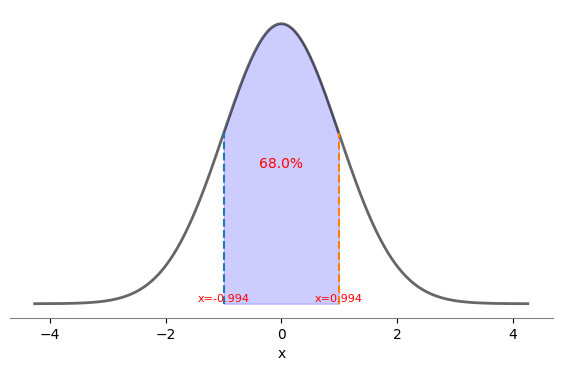

Intervalo para un nivel de confianza del 95%
media: 0.0, desv.std.: 1.0 , sesgo: 0.0, kurtosis: 0.0)
Nivel de confianza: 95.0%.
Percentiles a y b : 0.025 y 0.975
Valores de x      : -1.960 y 1.960.
Valores de Z o S  : -1.96 y 1.96
Probs. acums.     : 0.025 y 0.025.
Prob. a + b       : 5.00%.
dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


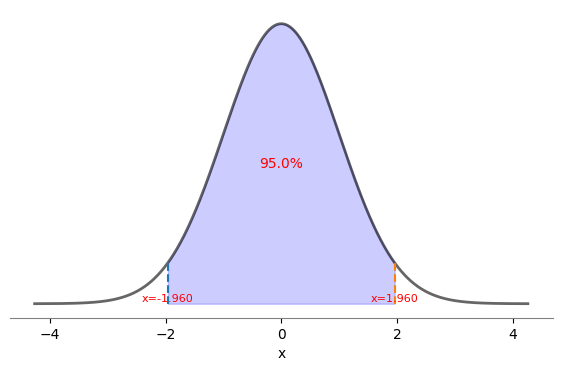

Intervalo para un nivel de confianza del 99%
media: 0.0, desv.std.: 1.0 , sesgo: 0.0, kurtosis: 0.0)
Nivel de confianza: 99.0%.
Percentiles a y b : 0.005 y 0.995
Valores de x      : -2.576 y 2.576.
Valores de Z o S  : -2.58 y 2.58
Probs. acums.     : 0.005 y 0.005.
Prob. a + b       : 1.00%.
dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


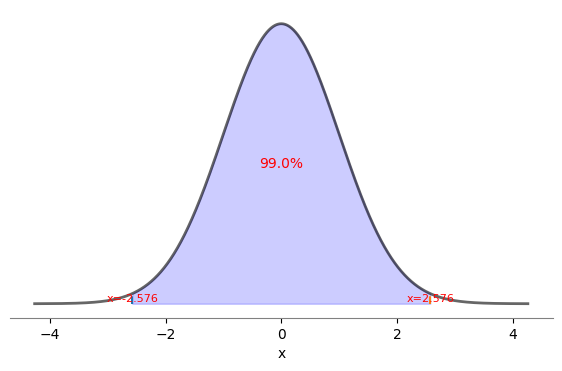

Intervalo para un nivel de confianza del 99,7%
media: 0.0, desv.std.: 1.0 , sesgo: 0.0, kurtosis: 0.0)
Nivel de confianza: 99.7%.
Percentiles a y b : 0.002 y 0.998
Valores de x      : -2.968 y 2.968.
Valores de Z o S  : -2.97 y 2.97
Probs. acums.     : 0.002 y 0.002.
Prob. a + b       : 0.30%.
dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


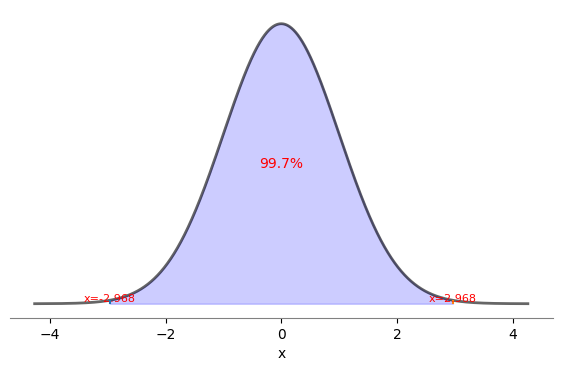

In [12]:
print("Intervalo para un nivel de confianza del 68%")
inter_confi(norm(), nc=0.68)
print("Intervalo para un nivel de confianza del 95%")
inter_confi(norm(), nc=0.95)
print("Intervalo para un nivel de confianza del 99%")
inter_confi(norm(), nc=0.99)
print("Intervalo para un nivel de confianza del 99,7%")
inter_confi(norm(), nc=0.997)

### Complementos del intervalo de confianza
Los complementos de los intervalos de confianza están dados los complementos de 68, 95, 99.7

dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


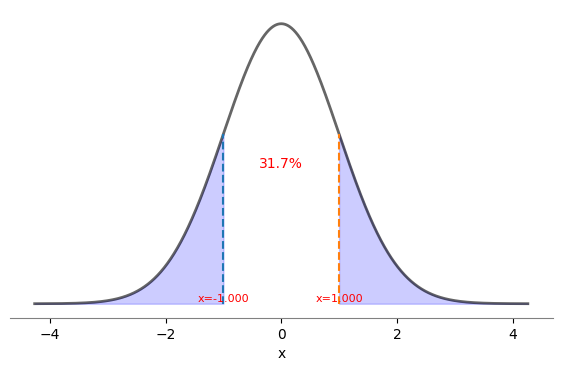

dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


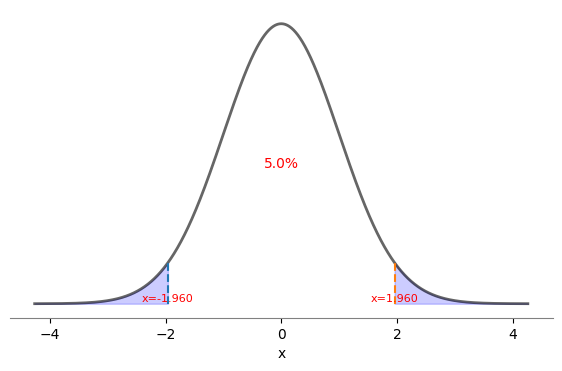

dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


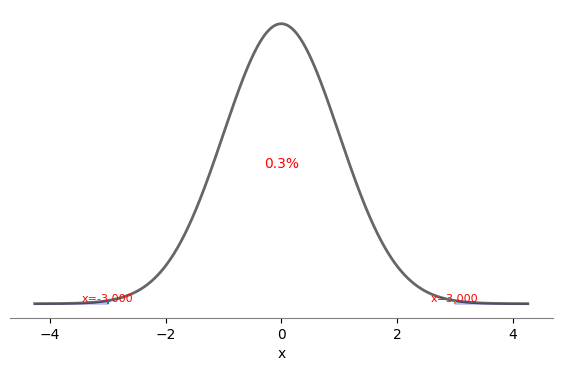

In [13]:
# Complementos de los intervalos de confianza
# 1. Probabilidad de que x esté fuera -1 y 1.
distr_prob(norm(), a=-1, b=1, between=False)

# 2. Probabilidad de que x esté entre -1 y 1.
distr_prob(norm(), a=-1.96, b=1.96, between=False)

# 2. Probabilidad de que x esté entre -1 y 1.
distr_prob(norm(), a=-3, b=3, between=False)

### Región Crítica, Nivel de signigicancia α, Valor Crítico Z
+ La región crítica (o región de rechazo) es el conjunto de todos los valores del estadístico de prueba que pueden provocar que rechacemos la hipótesis nula.
+ El nivel de significancia α es la probabilidad de que el estadístico de prueba caiga en la región crítica, cuando la hipótesis nula es verdadera.
+ Un valor crítico es cualquier valor que separa la región crítica (de rechazo) de los valores del estadístico que no conducen al rechazo de la hipótesis nula.  

Región Crítica del nivel de significancia de 5%
media: 0.0, desv.std.: 1.0 , sesgo: 0.0, kurtosis: 0.0)
α: 5.0%.
Probs. acums.     : 0.025 y 0.025.
Prob. a + b       : 5.00%.
Percentiles a y b : 0.025 y 0.975
Valores de x      : -1.960 y 1.960.
Valores de Z o S  : -1.96 y 1.96
dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


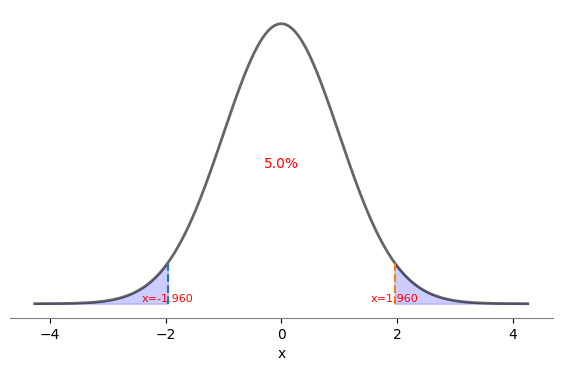

In [14]:
# Nivel de significancia 5% dos colas
print("Región Crítica del nivel de significancia de 5%")
reg_critica(norm(), rg=0.05)

Región Crítica del nivel de significancia de 5%
media: 0.0, desv.std.: 1.0 , sesgo: 0.0, kurtosis: 0.0)
α: 5.0%.
Prob. acum.     : 0.050 = 5.00%.
Percentiles a y b : 0.000 y 0.050
Valores de x      : -inf y -1.645.
Valores de Z o S  : -inf y -1.64
dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


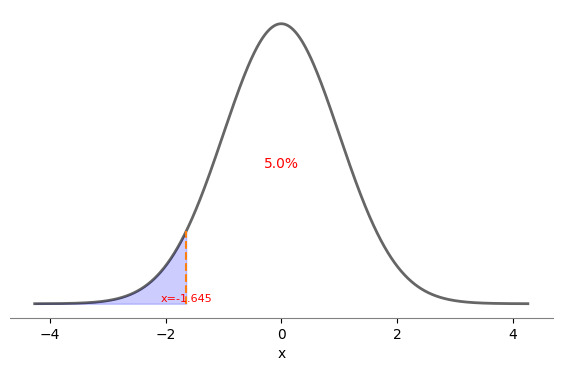

In [15]:
# Nivel de significancia 5% cola izquierda
print("Región Crítica del nivel de significancia de 5%")
reg_critica(norm(), rg=0.05, side='left')

Región Crítica del nivel de significancia de 5%
media: 0.0, desv.std.: 1.0 , sesgo: 0.0, kurtosis: 0.0)
α: 5.0%.
Prob. acum.     : 0.050 = 5.00%.
Percentiles a y b : 0.950 y 1.000
Valores de x      : 1.645 y inf.
Valores de Z o S  : 1.64 y inf
dist: norm, is_standard: True, dist.mean: 0.0, dist.std:1.0


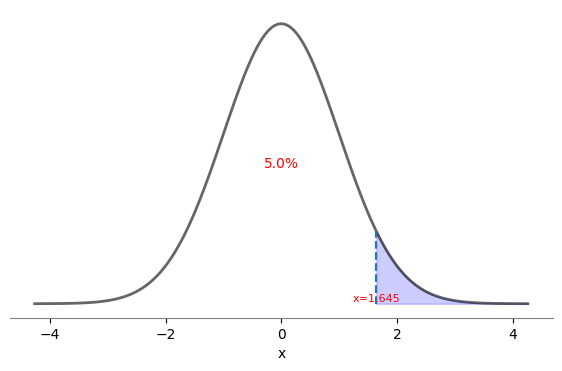

In [16]:
# Nivel de significancia 5% cola derecha
print("Región Crítica del nivel de significancia de 5%")
reg_critica(norm(), rg=0.05, side='right')

________________________________________________________________________________________________________________________________________________________________________